In [34]:
import pandas as pd
import numpy as np

In [35]:
df=pd.read_csv("/content/w1_student_scores-220925-152435.csv")

In [36]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


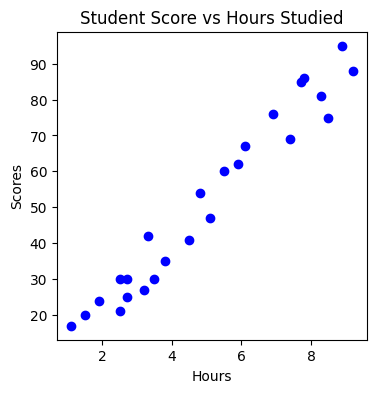

In [37]:
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(df['Hours'],df['Scores'],'bo')
plt.title('Student Score vs Hours Studied')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()



In [38]:
 xmean =np.mean(df['Hours'])
 ymean =np.mean(df['Scores'])


In [39]:
df['xycov']=(df['Hours']-xmean)*(df['Scores']- ymean)
df['xvar']=(df['Hours']-xmean)**2

In [40]:
slope=df['xycov'].sum() /df['xvar'].sum()
intercept=ymean-(slope * xmean)
print (f'slope={slope}')
print(f'intercept={intercept}')

slope=9.775803390787473
intercept=2.4836734053731817


In [41]:
intercept + slope*7

70.9142971408855

In [42]:
Scores_predicted = intercept + slope *df['Hours']

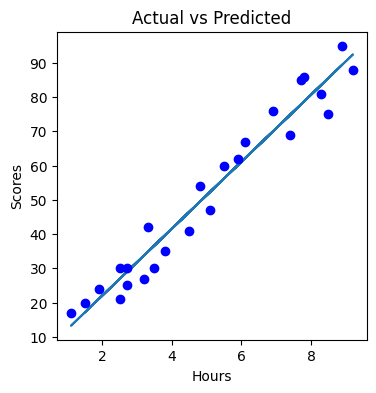

In [43]:
plt.figure(figsize=(4,4))
plt.plot(df['Hours'],Scores_predicted)
plt.plot(df['Hours'],df['Scores'],'bo')
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [44]:
df =pd.read_csv("/content/w1_petrol_consumption-220925-152435.csv")

In [45]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [46]:
df.shape

(48, 5)

In [47]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


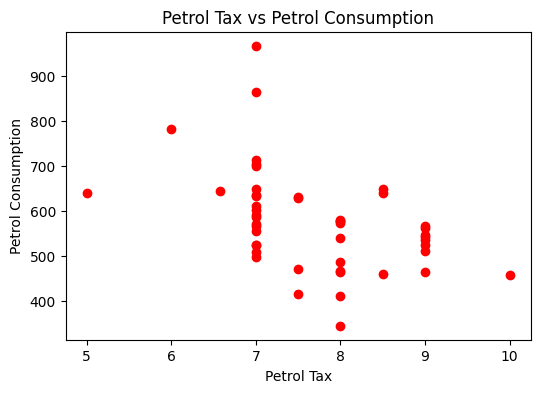

In [51]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(df['Petrol_tax'], df['Petrol_Consumption'], 'ro')
plt.title('Petrol Tax vs Petrol Consumption')
plt.xlabel('Petrol Tax')
plt.ylabel('Petrol Consumption')
plt.show()


In [53]:
y =df ['Petrol_Consumption']
x =df[['Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_tax']]

In [62]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
from os import register_at_fork
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [58]:
regressor.intercept_

361.45087906668397

In [59]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

In [64]:
y_pred = regressor.predict(x_test)

In [66]:
y_pred =regressor.predict(x_test)

In [67]:
results =pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MSE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)


print(f'Mean absolute error:{MSE:2f}')
print(f'Mean squared error:{MSE:2f}')
print(f' Root mean squared error:{ RMSE:2f}')

Mean absolute error:4083.255872
Mean squared error:4083.255872
 Root mean squared error:63.900359


In [73]:
 regressor.score(x_test,y_test)

0.39136640014305457

In [74]:
regressor.score(x_train,y_train)

0.7068781342155135